# Statistics Tasks
## Statistics Task 1 
**Tasks:** 
Load student-mat.csv and student-por.csv from UCI.
- How many rows and columns does each file contain?
- List categorical vs numeric features.
- Use a Markdown cell to explain your result

**Purpose:** 

**Big Takeaways:**


In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load both datasets
df_math = pd.read_csv('student-mat.csv', delimiter=';')
df_port = pd.read_csv('student-por.csv', delimiter=';')

print("=== Comparative Analysis of Both Datasets ===")

print("\n")

# Task 1: Basic information about both datasets
print("*** Dimensions for Each Dataset ***")
print(f"student-mat.csv dataset:")
print(f"  - Rows: {df_math.shape[0]}")
print(f"  - Columns: {df_math.shape[1]}")
print(f"student-por.csv dataset:")
print(f"  - Rows: {df_port.shape[0]}")
print(f"  - Columns: {df_port.shape[1]}")
print("\n")

# Tasks 2: Categorical vs Numberic Features 
print("*** Categorical vs Numeric Features***")




=== Comparative Analysis of Both Datasets ===


*** Dimensions for Each Dataset ***
student-mat.csv dataset:
  - Rows: 395
  - Columns: 33
student-por.csv dataset:
  - Rows: 649
  - Columns: 33


*** Categorical vs Numeric Features***


## Statistics Task 2
**Tasks:** 
For two CSVs respectively, identify the three features (attributes) that have the greatest
impact on students’ grade G1, G2, and G3. You may use heatmap to visualize the
correlation matrix from Provided dataset.

**Purpose:**  

**Big Takeaways:**

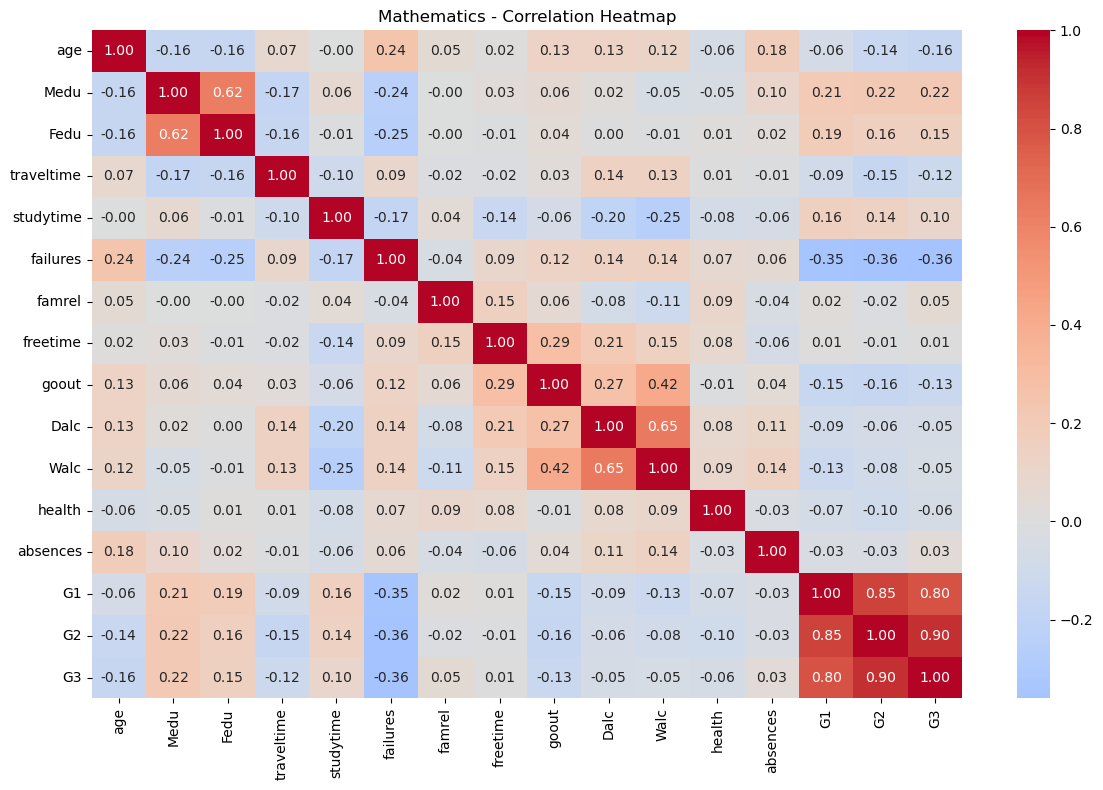

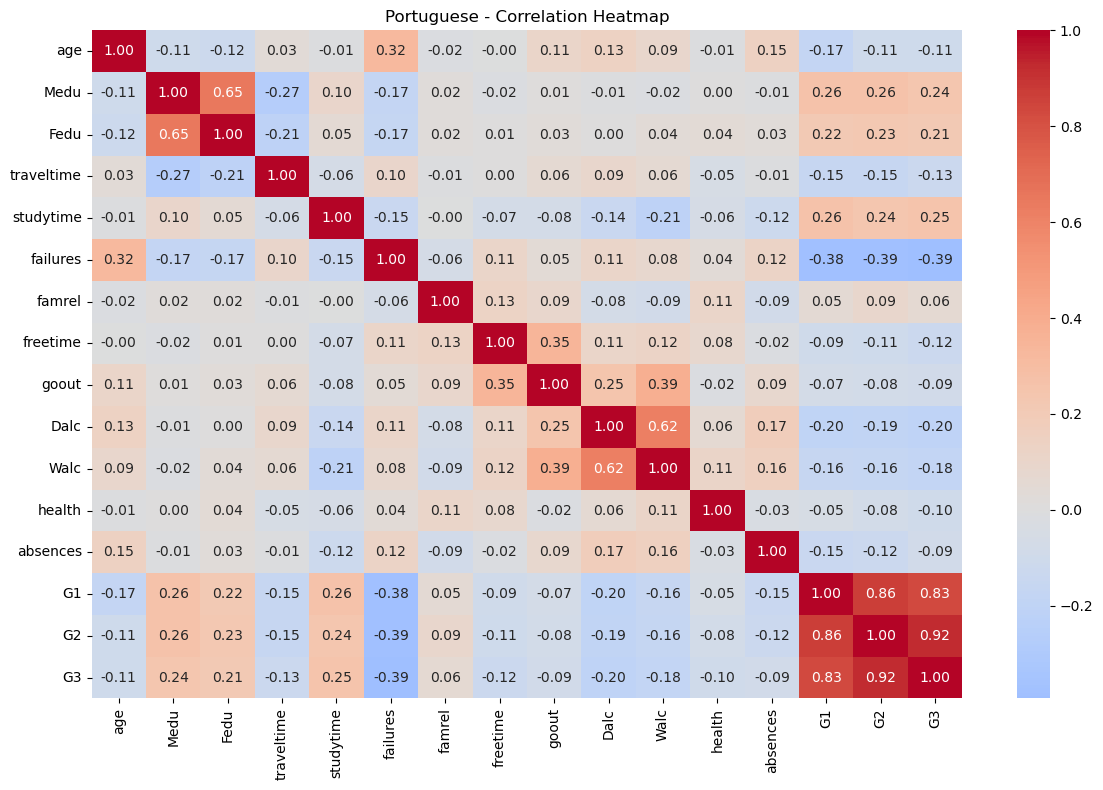

Top 3 Attributes in Math:
G1: ['G2', 'G3', 'failures']
G2: ['G3', 'G1', 'failures']
G3: ['G2', 'G1', 'failures']

Top 3 Attributes in Portuguese:
G1: ['G2', 'G3', 'failures']
G2: ['G3', 'G1', 'failures']
G3: ['G2', 'G1', 'failures']


In [137]:
# Select numeric features
numeric_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
                   'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 
                   'absences', 'G1', 'G2', 'G3']

# Mathematics heatmap
plt.figure(figsize=(12, 8))
math_corr = df_math[numeric_features].corr()
sns.heatmap(math_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Mathematics - Correlation Heatmap')
plt.tight_layout()
plt.show()


# Portuguese heatmap  
plt.figure(figsize=(12, 8))
port_corr = df_port[numeric_features].corr()
sns.heatmap(port_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Portuguese - Correlation Heatmap')
plt.tight_layout()
plt.show()


# Find top 3 features for each grade
def get_top_features(corr_matrix, grade):
    return corr_matrix[grade].drop(grade).abs().sort_values(ascending=False).head(3).index.tolist()

print("Top 3 Attributes in Math:")
print(f"G1: {get_top_features(math_corr, 'G1')}")
print(f"G2: {get_top_features(math_corr, 'G2')}") 
print(f"G3: {get_top_features(math_corr, 'G3')}")

print("\nTop 3 Attributes in Portuguese:")
print(f"G1: {get_top_features(port_corr, 'G1')}")
print(f"G2: {get_top_features(port_corr, 'G2')}")
print(f"G3: {get_top_features(port_corr, 'G3')}")


## Statistics Task 3
**Tasks:** For two CSVs respectively, select any four attributes and appropriate statistical results,
and use bar plots to present them. 

**Purpose:**  

**Big Takeaways:** 

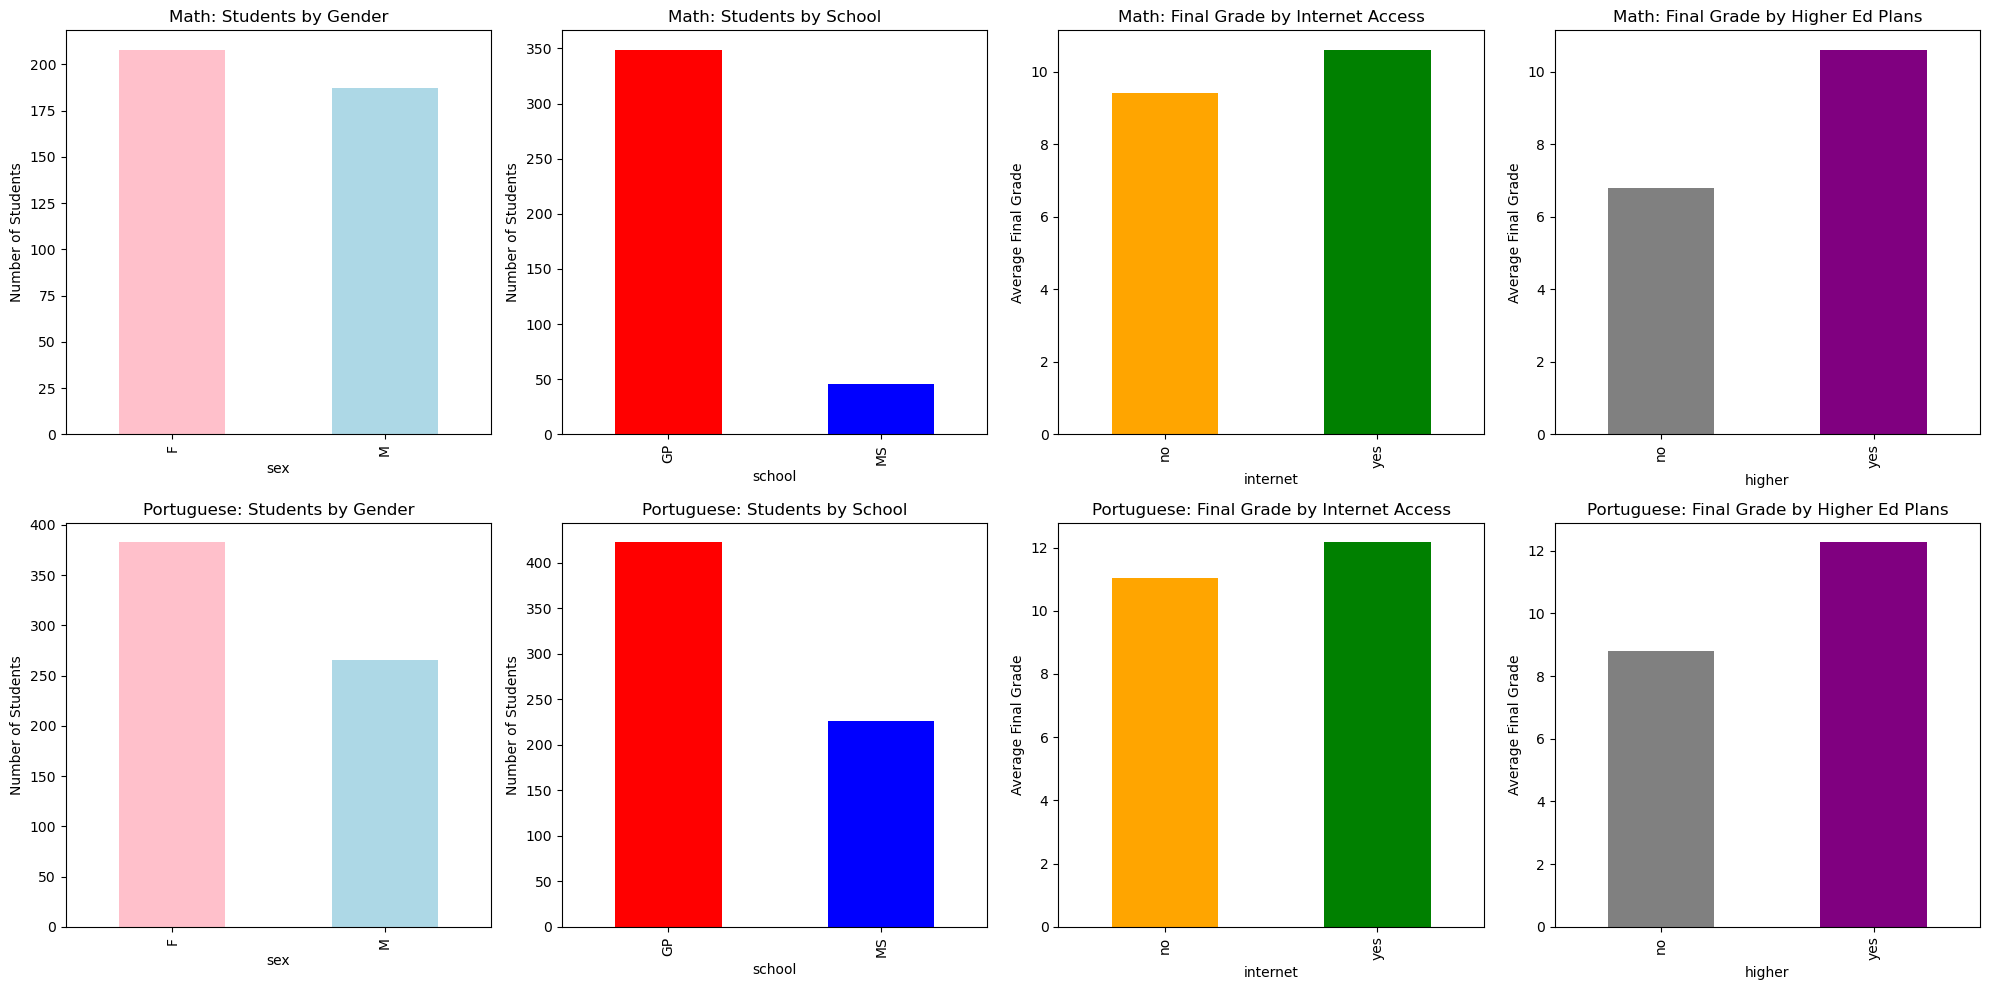

In [138]:
# Create bar plots for both datasets
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Mathematics Plots
df_math['sex'].value_counts().plot(kind='bar', ax=axes[0,0], color=['pink', 'lightblue'])
axes[0,0].set_title('Math: Students by Gender')
axes[0,0].set_ylabel('Number of Students')

df_math['school'].value_counts().plot(kind='bar', ax=axes[0,1], color=['red', 'blue'])
axes[0,1].set_title('Math: Students by School')
axes[0,1].set_ylabel('Number of Students')

df_math.groupby('internet')['G3'].mean().plot(kind='bar', ax=axes[0,2], color=['orange', 'green'])
axes[0,2].set_title('Math: Final Grade by Internet Access')
axes[0,2].set_ylabel('Average Final Grade')

df_math.groupby('higher')['G3'].mean().plot(kind='bar', ax=axes[0,3], color=['gray', 'purple'])
axes[0,3].set_title('Math: Final Grade by Higher Ed Plans')
axes[0,3].set_ylabel('Average Final Grade')

# Portuguese Plots
df_port['sex'].value_counts().plot(kind='bar', ax=axes[1,0], color=['pink', 'lightblue'])
axes[1,0].set_title('Portuguese: Students by Gender')
axes[1,0].set_ylabel('Number of Students')

df_port['school'].value_counts().plot(kind='bar', ax=axes[1,1], color=['red', 'blue'])
axes[1,1].set_title('Portuguese: Students by School')
axes[1,1].set_ylabel('Number of Students')

df_port.groupby('internet')['G3'].mean().plot(kind='bar', ax=axes[1,2], color=['orange', 'green'])
axes[1,2].set_title('Portuguese: Final Grade by Internet Access')
axes[1,2].set_ylabel('Average Final Grade')

df_port.groupby('higher')['G3'].mean().plot(kind='bar', ax=axes[1,3], color=['gray', 'purple'])
axes[1,3].set_title('Portuguese: Final Grade by Higher Ed Plans')
axes[1,3].set_ylabel('Average Final Grade')

plt.tight_layout()
plt.show()

## Statistics Task 4
**Tasks:** For two CSVs respectively, select any four attributes and appropriate statistical results,
and use line plots to present them.



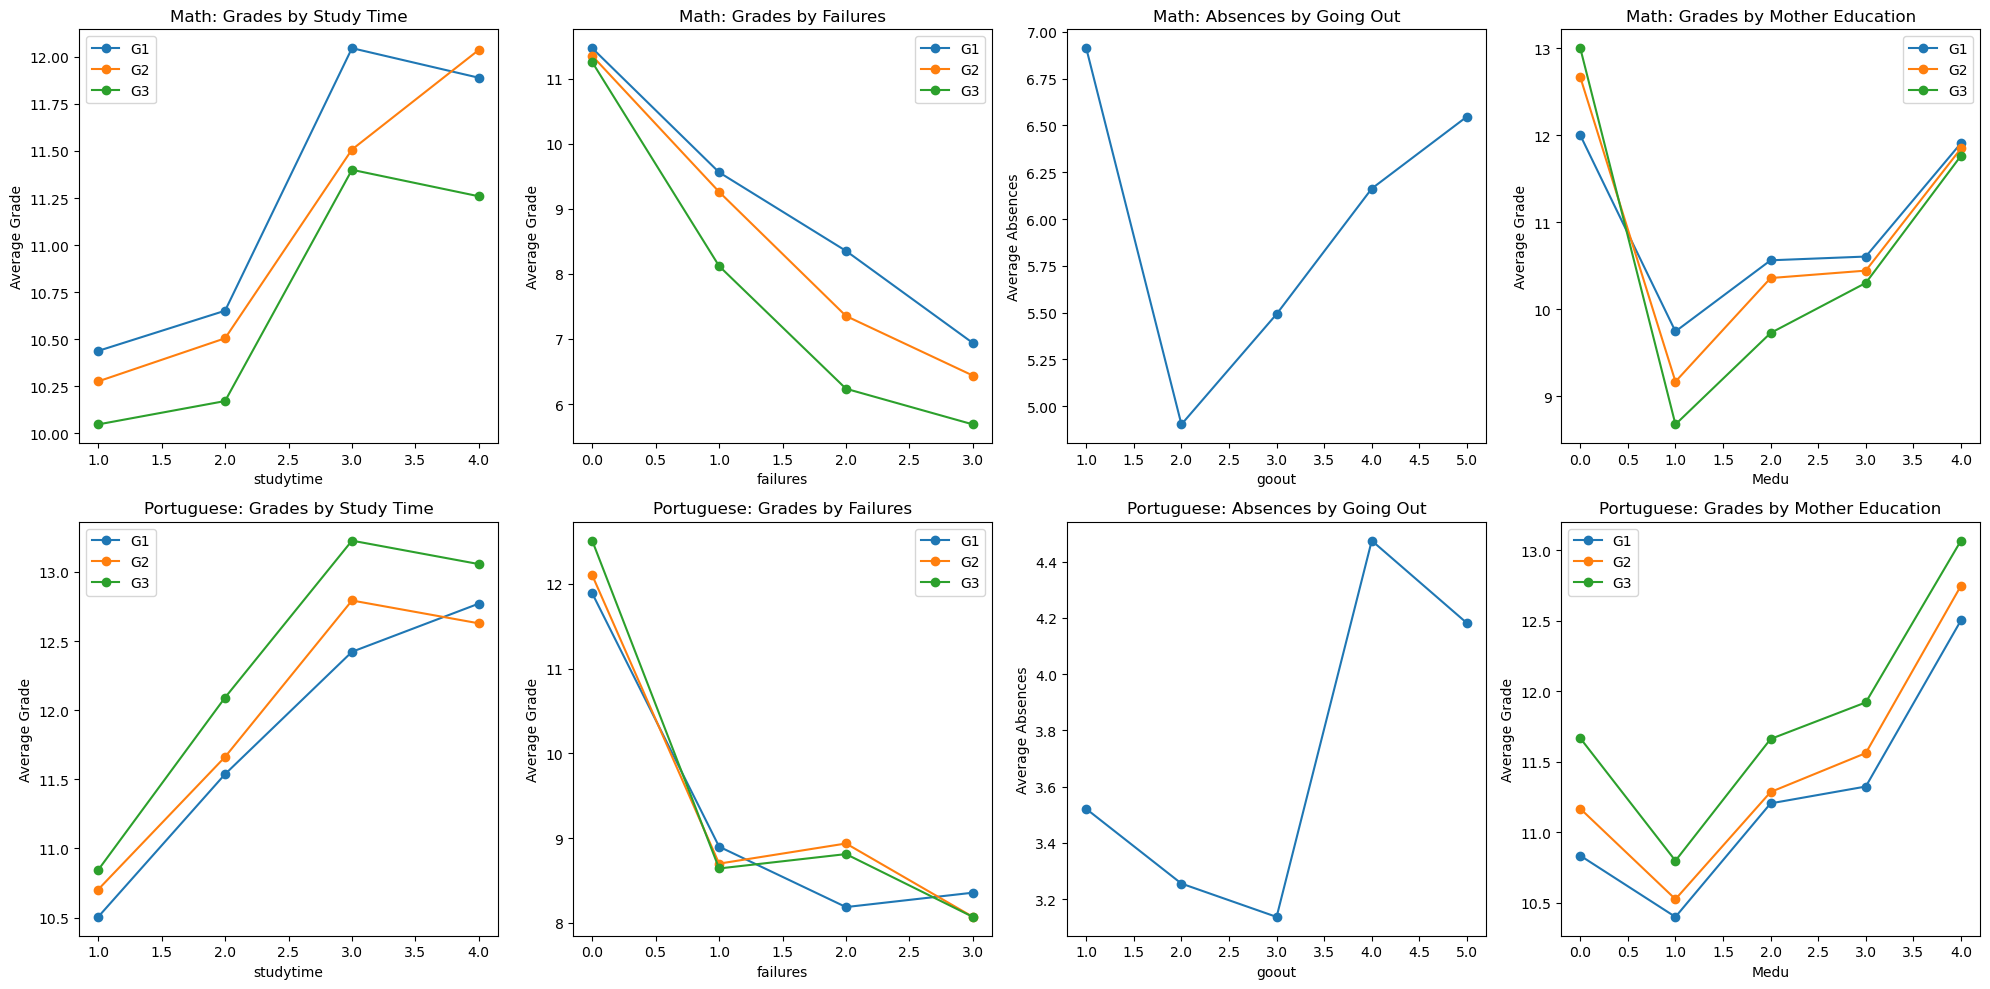

In [139]:

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Mathematics Plots
df_math.groupby('studytime')[['G1', 'G2', 'G3']].mean().plot(kind='line', marker='o', ax=axes[0,0])
axes[0,0].set_title('Math: Grades by Study Time')
axes[0,0].set_ylabel('Average Grade')

df_math.groupby('failures')[['G1', 'G2', 'G3']].mean().plot(kind='line', marker='o', ax=axes[0,1])
axes[0,1].set_title('Math: Grades by Failures')
axes[0,1].set_ylabel('Average Grade')

df_math.groupby('goout')['absences'].mean().plot(kind='line', marker='o', ax=axes[0,2])
axes[0,2].set_title('Math: Absences by Going Out')
axes[0,2].set_ylabel('Average Absences')

df_math.groupby('Medu')[['G1', 'G2', 'G3']].mean().plot(kind='line', marker='o', ax=axes[0,3])
axes[0,3].set_title('Math: Grades by Mother Education')
axes[0,3].set_ylabel('Average Grade')

# Portuguese Plots
df_port.groupby('studytime')[['G1', 'G2', 'G3']].mean().plot(kind='line', marker='o', ax=axes[1,0])
axes[1,0].set_title('Portuguese: Grades by Study Time')
axes[1,0].set_ylabel('Average Grade')

df_port.groupby('failures')[['G1', 'G2', 'G3']].mean().plot(kind='line', marker='o', ax=axes[1,1])
axes[1,1].set_title('Portuguese: Grades by Failures')
axes[1,1].set_ylabel('Average Grade')

df_port.groupby('goout')['absences'].mean().plot(kind='line', marker='o', ax=axes[1,2])
axes[1,2].set_title('Portuguese: Absences by Going Out')
axes[1,2].set_ylabel('Average Absences')

df_port.groupby('Medu')[['G1', 'G2', 'G3']].mean().plot(kind='line', marker='o', ax=axes[1,3])
axes[1,3].set_title('Portuguese: Grades by Mother Education')
axes[1,3].set_ylabel('Average Grade')

plt.tight_layout()
plt.show()

# Data Mining Tasks
## Decision Tree for student-mat.csv
**Tasks:** 
Please use the decision tree model to extract a Rule related to the student’s grade
classification (You can define your mining goals) from the provided dataset. (You
may just use a few features not all).
- You need to visualize the extracted rules and set the maximum depth to 4.
- Use a Markdown cell to explain the purpose of your figure and the big takeaway.

**Purpose:**   

**Big Takeaways:** 
 


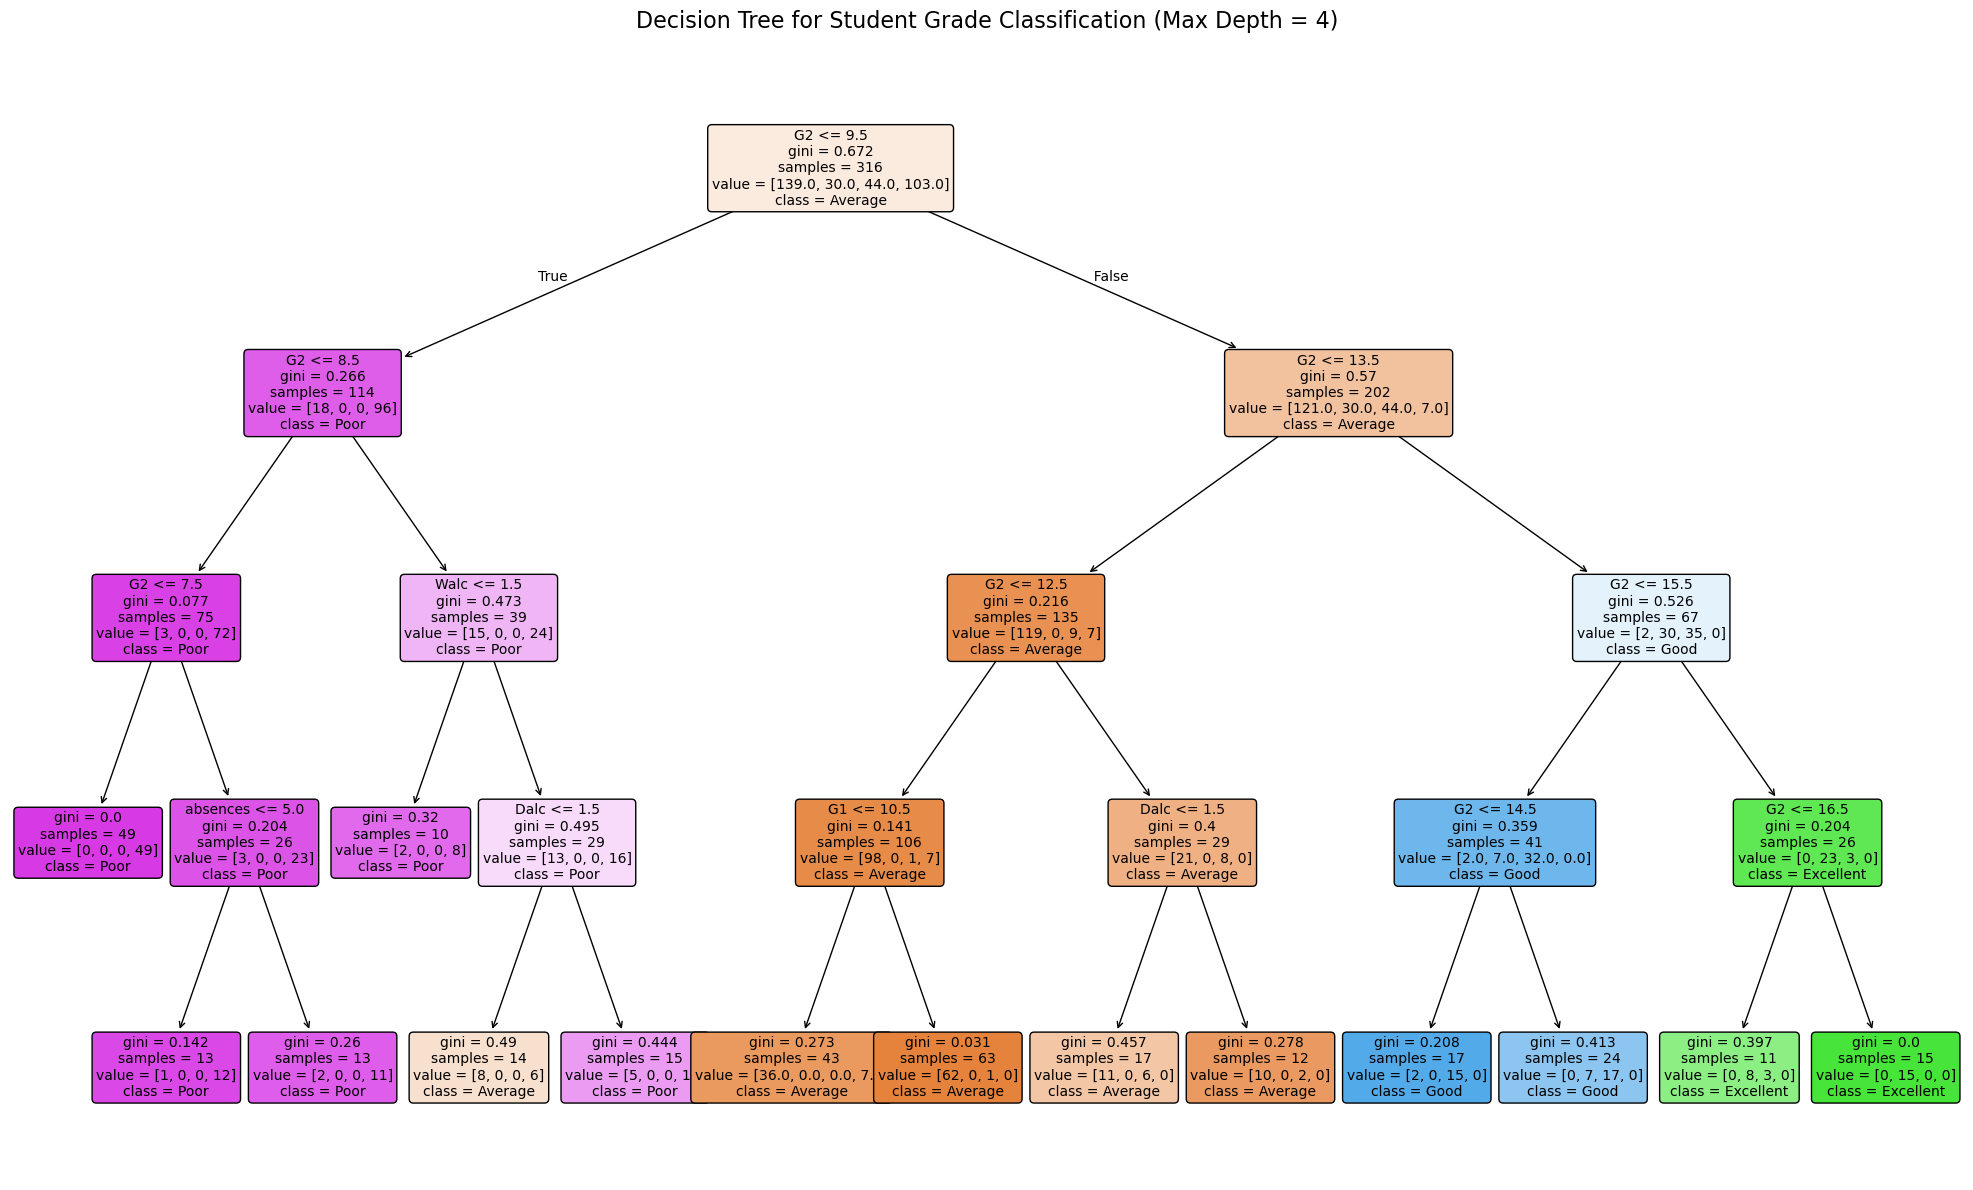

In [158]:
# Load the data
df = pd.read_csv('student-mat.csv', delimiter=';')

# Define grade classification based on G3 (final grade)
def classify_grade(grade):
    if grade >= 16:
        return 'Excellent'
    elif grade >= 14:
        return 'Good'
    elif grade >= 10:
        return 'Average'
    else:
        return 'Poor'

df['grade_category'] = df['G3'].apply(classify_grade)

# Select key features for analysis
features = ['studytime', 'failures', 'absences', 'G1', 'G2', 'goout', 'Dalc', 'Walc', 'health']
target = 'grade_category'

# Prepare data
X = df[features]
y = df[target]


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train decision tree with max depth of 4
dt_classifier = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)
dt_classifier.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 12))
plot_tree(
    dt_classifier,
    feature_names=features,
    class_names=dt_classifier.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Decision Tree for Student Grade Classification (Max Depth = 4)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

## Naive Bayes for student-por.csv:
**Tasks:** 
Create a binary target variable passed (1 if G3 ≥ 12, 0 otherwise). Show the class distribution (% passed vs failed). Explain your results a Markdown cell.

• Given the features studytime, absences, and G1 (first period grade), can we predict whether a student will pass or fail (same rules 1 if G1 ≥ 12, 0 otherwise.) the course using a Naive Bayes classifier? Explain your results a Markdown cell.

You need to visualize your results with scatter (True vs prediction) and Confusion Matrix.
• Using the features studytime, failures, schoolsup, famsup, and activities, can we
predict whether a student will achieve a high, medium, or low final grade G3
(You can define these level range) using a Multinomial Naive Bayes classifier?
Explain your results a Markdown cell. You need to visualize your results with
Confusion Matrix.

## Student Performance: Passed vs Failed: 
This code shows the percentage of people who passed and failed the porteguse class, as you can see 53.6% passed, and 46.38% have failed. 

Class Distribution:
Passed (G3 >= 12): 348 students (53.62%)
Failed (G3 < 12): 301 students (46.38%)


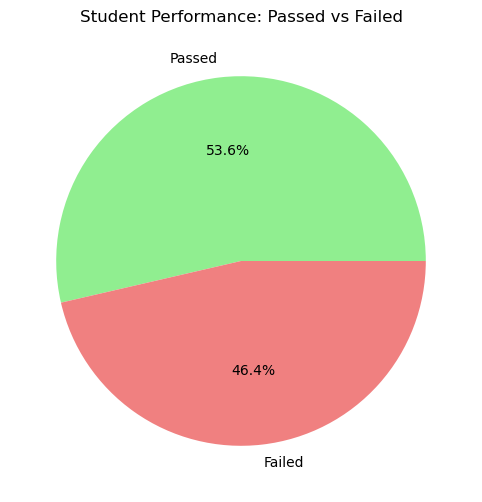

In [161]:
df = pd.read_csv('student-por.csv', delimiter=';')
df['passed'] = (df['G3'] >= 12).astype(int)

# Show class distribution
passed_count = df['passed'].sum()
failed_count = len(df) - passed_count
passed_percentage = (passed_count / len(df)) * 100

print("Class Distribution:")
print(f"Passed (G3 >= 12): {passed_count} students ({passed_percentage:.2f}%)")
print(f"Failed (G3 < 12): {failed_count} students ({100-passed_percentage:.2f}%)")

# Visualization
plt.figure(figsize=(8, 6))
plt.pie([passed_percentage, 100-passed_percentage], labels=['Passed', 'Failed'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Student Performance: Passed vs Failed')
plt.show()

## Naive Bayes Classifier using studytime, absences, and G1

=== Binary Classification Results (studytime, absences, G1) ===
Accuracy: 0.6051

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.51      0.58       103
           1       0.57      0.71      0.63        92

    accuracy                           0.61       195
   macro avg       0.61      0.61      0.60       195
weighted avg       0.62      0.61      0.60       195



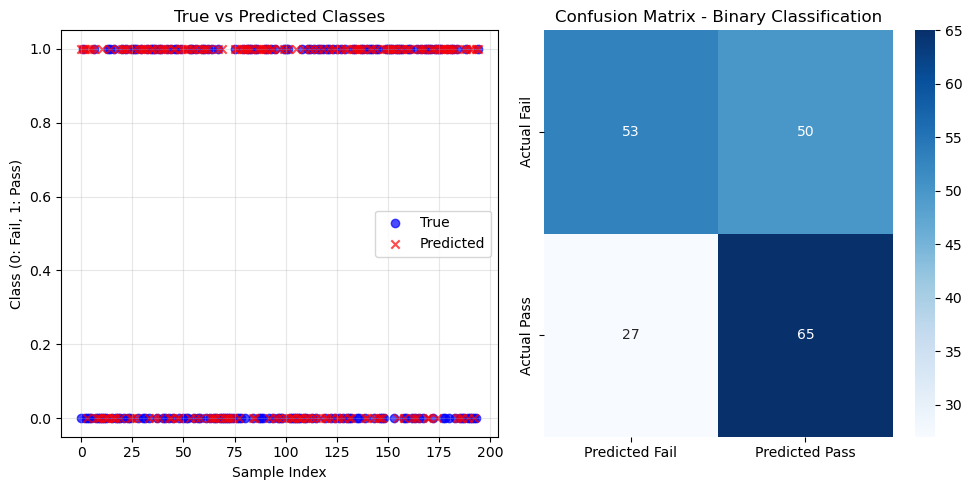

Confusion Matrix Details:
True Negatives: 53
False Positives: 50
False Negatives: 27
True Positives: 65


In [172]:
# Create binary target for G1 (1 if G1 >= 12, 0 otherwise)
df['G1_binary'] = (df['G1'] >= 12).astype(int)

# Select features and target
features_binary = ['studytime', 'absences', 'G1']
X_binary = df[features_binary]
y_binary = df['G1_binary']

# Split the data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_binary, y_binary, test_size=0.3, random_state=42, stratify=y_binary
)

# Train Multinomial Naive Bayes classifier
mnb_binary = MultinomialNB()
mnb_binary.fit(X_train_bin, y_train_bin)

# Make predictions
y_pred_binary = mnb_binary.predict(X_test_bin)

# Calculate accuracy
accuracy_binary = accuracy_score(y_test_bin, y_pred_binary)

print("=== Binary Classification Results (studytime, absences, G1) ===")
print(f"Accuracy: {accuracy_binary:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_bin, y_pred_binary, zero_division=0))

# Visualization 1: Scatter plot of True vs Predicted
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test_bin)), y_test_bin, alpha=0.7, label='True', color='blue')
plt.scatter(range(len(y_pred_binary)), y_pred_binary, alpha=0.7, label='Predicted', color='red', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Class (0: Fail, 1: Pass)')
plt.title('True vs Predicted Classes')
plt.legend()
plt.grid(True, alpha=0.3)

# Visualization 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm_binary = confusion_matrix(y_test_bin, y_pred_binary)
sns.heatmap(cm_binary, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Fail', 'Predicted Pass'],
            yticklabels=['Actual Fail', 'Actual Pass'])
plt.title('Confusion Matrix - Binary Classification')
plt.tight_layout()
plt.show()

# Print confusion matrix details
print("Confusion Matrix Details:")
print(f"True Negatives: {cm_binary[0,0]}")
print(f"False Positives: {cm_binary[0,1]}")
print(f"False Negatives: {cm_binary[1,0]}")
print(f"True Positives: {cm_binary[1,1]}")

## Multinomial Naive Bayes for Grade Levels

=== Grade Level Distribution ===
grade_level
Medium    418
High      131
Low       100
Name: count, dtype: int64

Percentage distribution:
grade_level
Medium    64.41
High      20.18
Low       15.41
Name: count, dtype: float64

=== Multiclass Classification Results ===
Accuracy: 0.6462

Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        39
         Low       0.50      0.20      0.29        30
      Medium       0.66      0.95      0.78       126

    accuracy                           0.65       195
   macro avg       0.39      0.38      0.35       195
weighted avg       0.50      0.65      0.55       195



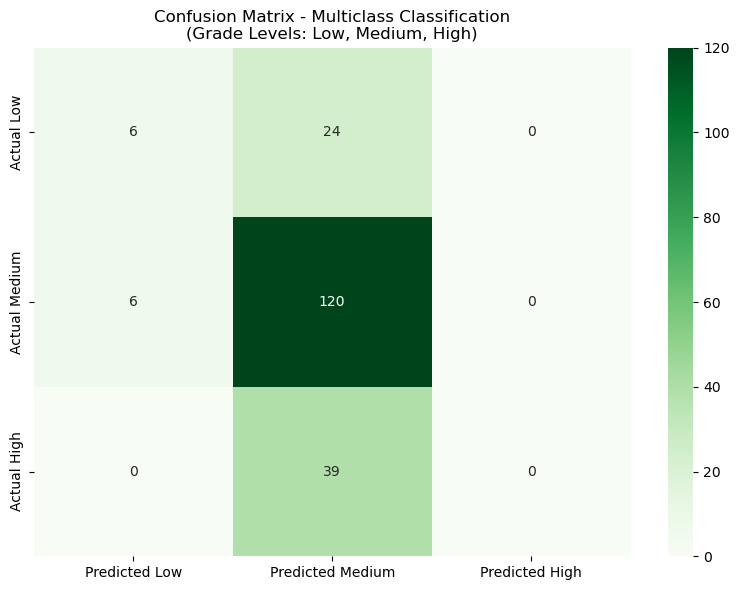

In [171]:
# Define more balanced grade levels for G3
def categorize_grade(grade):
    if grade >= 15:  # Adjusted threshold for better balance
        return 'High'
    elif grade >= 10:
        return 'Medium'
    else:
        return 'Low'

df['grade_level'] = df['G3'].apply(categorize_grade)

# Show distribution of grade levels
grade_distribution = df['grade_level'].value_counts()
print("=== Grade Level Distribution ===")
print(grade_distribution)
print("\nPercentage distribution:")
print((grade_distribution / len(df) * 100).round(2))

# Select features for multiclass classification
features_multi = ['studytime', 'failures', 'schoolsup', 'famsup', 'activities']

# Convert categorical features to numerical
le = LabelEncoder()
X_multi = df[features_multi].copy()
for col in ['schoolsup', 'famsup', 'activities']:
    X_multi[col] = le.fit_transform(X_multi[col])

y_multi = df['grade_level']

# Split the data with stratification
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.3, random_state=42, stratify=y_multi
)

# Train Multinomial Naive Bayes classifier
mnb_multi = MultinomialNB()
mnb_multi.fit(X_train_multi, y_train_multi)

# Make predictions
y_pred_multi = mnb_multi.predict(X_test_multi)

# Calculate accuracy
accuracy_multi = accuracy_score(y_test_multi, y_pred_multi)

print("\n=== Multiclass Classification Results ===")
print(f"Accuracy: {accuracy_multi:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_multi, y_pred_multi, zero_division=0))

# Visualization: Confusion Matrix for multiclass
plt.figure(figsize=(8, 6))
cm_multi = confusion_matrix(y_test_multi, y_pred_multi, labels=['Low', 'Medium', 'High'])
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted Low', 'Predicted Medium', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual Medium', 'Actual High'])
plt.title('Confusion Matrix - Multiclass Classification\n(Grade Levels: Low, Medium, High)')
plt.tight_layout()
plt.show()

# Additional analysis: Feature importance insight
print("\n=== Class Distribution in Training Data ===")
print("Number of samples per class in training set:")
for class_name in np.unique(y_train_multi):
    count = (y_train_multi == class_name).sum()
    percentage = (count / len(y_train_multi)) * 100
    print(f"{class_name}: {count} samples ({percentage:.1f}%)")

# Feature analysis
print("\n=== Feature Analysis ===")
feature_stats = X_multi.groupby(y_multi).mean()
print("Average feature values by grade level:")
print(feature_stats.round(2))

# Check feature value ranges
print("\n=== Feature Value Ranges ===")
print("Feature ranges (min, max):")
for col in X_multi.columns:
    print(f"{col}: {X_multi[col].min()} to {X_multi[col].max()}")